# **Description : Sentiment Analysis Program that parses the tweets fetched from twitter**

#**Installing required libraries**

In [1]:
# !pip install tweepy
# !pip install textblob
# !pip install wordcloud
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip insatll re

# **Importing required libraries**

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  

# **Loading the twitter credentials**

In [3]:
"""The twitter credentials consists of API Key, 
API Key Secret, Access Token and Access Token Secret
and the above details can be obtained by creating a twitter account then creating a twitter app 
on the twitter developer website. The link is provide below:
https://developer.twitter.com/"""
log = pd.read_csv('login.csv')
log

,api_key,api_key_secret,access_token,access_token_secret
0,hOqMhh7CLNzob90G1jCXeuKf7,UqIFDLu8nl3O6AjCz5ZZyEY2u2tDZaFiISunSypigxTZiA...,1533793270513299457-Tbd1K5oR1vQN9g8AaYW1vL5Smh...,I1bNXs4tbQKtKFuiRSLvxzmbwoy8TLAT47I3zMbSNGqNI


# **Loading twitter api credentials from csv file**

In [4]:
# Twitter Credentials
consumerKey=log['api_key'][0]
consumerSecret=log['api_key_secret'][0]
accessToken=log['access_token'][0]
accessTokenSecret=log['access_token_secret'][0]

In [5]:
# consumerKey

# **Authenticating**

In [6]:
# Create authentication object
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)

# Set the access token
authenticate.set_access_token(accessToken,accessTokenSecret)

# Create the API object while passing in the auth information
api=tweepy.API(authenticate,wait_on_rate_limit=True)

# **Accessing twitter posts for Elon Musk**

In [7]:
# Extract 100 tweets from the twitter user
posts=api.user_timeline(screen_name="ElonMusk",count=100,lang="en",tweet_mode="extended")

# Print the last 5 tweets from the Bill Gates
print("Show the 5 recent tweets:\n")
count=1

for tweet in posts[0:5]:
  print(str(count)+") "+tweet.full_text+'\n')
  count+=1

Show the 5 recent tweets:

1) @historydefined If little red riding hood was on psychedelics, this whole story makes a ton of sense

2) @jeremychrysler @Tesla We will look into this &amp; adjust. In general, I’d recommend against using recirc, as the range advantage is small.

3) @historydefined Seems odd that anyone would mistake a talking wolf for their grandmother. What sort of octave range does that wolf have anyway!?

4) @TrungTPhan 👀

5) @Rainmaker1973 I think I saw these in Elden Ring



# **Creating dataframe from obtained results**

In [8]:
# Create a dataframe with a column Tweets
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

# Show the first 5 rows of data
df.head()

,Tweets
0,@historydefined If little red riding hood was ...
1,@jeremychrysler @Tesla We will look into this ...
2,@historydefined Seems odd that anyone would mi...
3,@TrungTPhan 👀
4,@Rainmaker1973 I think I saw these in Elden Ring


# **Data Preprocessing**

In [9]:
# Clean the text
# Creating a function to clean the tweets

def cleanText(txt):
  # removing @mentions
  text=re.sub(r'@[A-Za-z0-9]+','',txt)
  # removing hastag symbol
  text=re.sub(r'@#','',text)
  # removing ReTweets
  text=re.sub(r'RT[\s]+','',text)
  # removing the hyperlink
  text=re.sub(r'https:\/\S+','',text)
  return text

In [10]:
# Cleaning the text
df['Tweets']=df['Tweets'].apply(cleanText)

# Showing the clean data
df.head()

,Tweets
0,If little red riding hood was on psychedelics...
1,We will look into this &amp; adjust. In gene...
2,Seems odd that anyone would mistake a talking...
3,👀
4,I think I saw these in Elden Ring


# **Calculating Subjectivity & Polarity**

In [11]:
# Create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Creating two new features for subjectivity and polarity
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

In [12]:
# Showing the created dataframe
df.head()

,Tweets,Subjectivity,Polarity
0,If little red riding hood was on psychedelics...,0.30,0.004167
1,We will look into this &amp; adjust. In gene...,0.45,-0.100000
2,Seems odd that anyone would mistake a talking...,0.25,-0.208333
3,👀,0.00,0.000000
4,I think I saw these in Elden Ring,0.00,0.000000


# **Plotting on WordCloud**

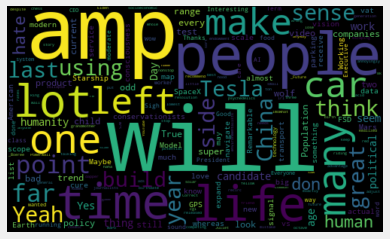

In [13]:
# Plot The Word Cloud
allWords=''.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# **Calculating positive, negative and neutral responses**

In [14]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score>0: 
        return 'Positive'
    elif score==0:
        return 'Neutral'
    else:
        return 'Negative'

# Creating new feature called Analysis for the response of tweets
df['Analysis']=df['Polarity'].apply(getAnalysis)

In [15]:
# Showing the analysis of the tweets, whether they are positive, negative or neutral
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,If little red riding hood was on psychedelics...,0.30,0.004167,Positive
1,We will look into this &amp; adjust. In gene...,0.45,-0.100000,Negative
2,Seems odd that anyone would mistake a talking...,0.25,-0.208333,Negative
3,👀,0.00,0.000000,Neutral
4,I think I saw these in Elden Ring,0.00,0.000000,Neutral


# **Printing all the positive, negative and neutral tweets**

In [16]:
# Printing all the positive tweets
sortedDf=df.sort_values(by=['Polarity'])

count=1
for i in range(len(sortedDf)):
    if sortedDf['Analysis'][i]=='Positive':
        print(str(count)+') '+sortedDf['Tweets'][i]+'\n')
        count+=1

1)  If little red riding hood was on psychedelics, this whole story makes a ton of sense

2)  True haha

3) _ Yeah, exactly. Also, other companies are using the Tesla name for solar and Powerwall. Will put a stop to that.

4)  It will be our best product ever imo

5)  _Boeree There are still some great journalists at WaPo, but the trend is super bad

6) _Future Most people still think China has a one-child policy. 

China had its lowest birthdate ever last year, despite having a three-child policy!

At current birth rates, China will lose ~40% of people every generation!

Population collapse.

7) From Shakespeare’s The Tempest, but I much prefer it literally vs ironically

8) O wonder!
How many goodly creatures are there here!
How beauteous mankind is! O brave new world,
That has such people in't.

9)   Earth could sustain many times its current human population and the ecosystem would be fine. We definitely don’t have “too many people”.

10)  This sounds promising

11)  Build 1000+ St

In [17]:
# Printing all the negative tweets
sortedDf=df.sort_values(by=['Polarity'])

count=1
for i in range(len(sortedDf)):
    if sortedDf['Analysis'][i]=='Negative':
        print(str(count)+') '+sortedDf['Tweets'][i]+'\n')
        count+=1

1)   We will look into this &amp; adjust. In general, I’d recommend against using recirc, as the range advantage is small.

2)  Seems odd that anyone would mistake a talking wolf for their grandmother. What sort of octave range does that wolf have anyway!?

3) If chess was released as a video game 

4) The acid test for any two competing socioeconomic systems is which side needs to build a wall to keep people from escaping? That’s the bad one!

5) Realized what I have in common with environmentalists, but also why they’re so annoyingly wrong: 

They are conservationists of what is, whereas they should be conservationists of our potential over time, our cosmic endowment.

(From a friend)

6)  There are so many crazy rules like this that make it extremely difficult to build anything new in California

7) Some hate humanity, but I love humanity so much

8) Making life multiplanetary expands the scope &amp; scale of consciousness. 

It also enables us to backup the biosphere, protecting al

In [18]:
# Printing all the neutral tweets
sortedDf=df.sort_values(by=['Polarity'])

count=1
for i in range(len(sortedDf)):
    if sortedDf['Analysis'][i]=='Neutral':
        print(str(count)+') '+sortedDf['Tweets'][i]+'\n')
        count+=1

1)  👀

2)  I think I saw these in Elden Ring

3) 

4)  🤣

5) YouTube seems to be nonstop scam ads

6)   It looks like the future

7)  cgi irl

8) What resolution is life in, 8k? – SJM

9)  Correct

10)   🤣

11)  Romeo and Juliet

12)  🤣👍

13)   Such a dapper fellow!

14) _Skeptic We are a brain in a vat – the vat is our skull. All our senses and memories are electrical signals.

15) : HEPA air filter in Model Y, S and X removes &gt;99.97% of dust, pollen, mold, bacteria and any airborne particles 

16)  Maybe we should make an actual Starship model that dispenses pez for our merch store

17) Deck from SpaceX all-hands update talk I gave last week 

18)  It should be possible

19)  That is why we must expand the scope &amp; scale of consciousness – so that we may learn the answers to these questions

20)    Not perfect, but should be better

21) _g_fischer We are close to the point where offering something for EU regulators to review makes sense

22) Working on Tesla North American serv

# **Plotting graph of polarity and subjectivity**

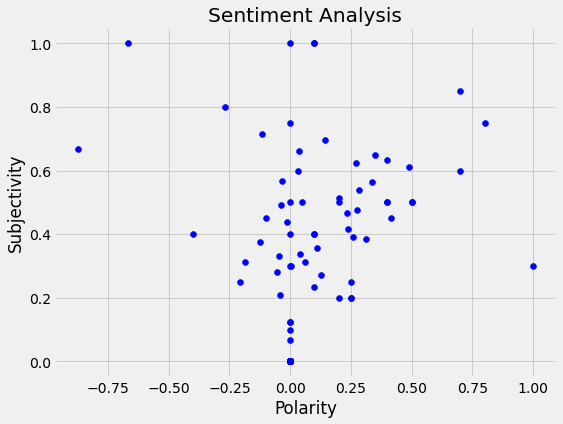

In [19]:
# Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
plt.scatter(df['Polarity'],df['Subjectivity'],color="Blue")
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

# **Calculating percentage of positive, negative and neutral tweets**

In [20]:
# Get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweet=ptweets['Tweets']
val=round(len(ptweet)/len(df)*100,1)
val

40.0

In [21]:
# Get the percentage of negative tweets
ptweets=df[df.Analysis=='Negative']
ptweet=ptweets['Tweets']
val=round(len(ptweet)/len(df)*100,1)
val

15.0

In [22]:
# Get the percentage of neutral tweets
ptweets=df[df.Analysis=='Neutral']
ptweet=ptweets['Tweets']
val=round(len(ptweet)/len(df)*100,1)
val

45.0

# **Plotting graph for positive, negative and neutral posts.**

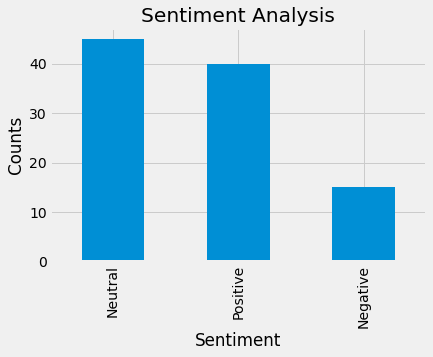

In [23]:
# Show the value counts
Counts=df['Analysis'].value_counts()

# plot and visualize the counts
plt.title("Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()